In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
data = pd.read_csv('G:\My Drive\Programming\Biotech Research Project\imputed_trainset.csv')

In [3]:
data

,cls,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,1.0,0.0,0.0,25.001104,2.501652,4.923679,25.001104,1.250055,3.907976,3.763026,...,9.918524,67.526731,284.075684,8.877365,764.0,32.0,100.0,119.0,7.777778,4.666667
1,1.0,0.0,0.0,20.274271,2.409184,4.779725,20.274271,1.267142,3.699349,3.675755,...,9.636588,61.986524,226.038985,9.827782,429.0,23.0,82.0,96.0,6.166667,3.583333
2,1.0,0.0,0.0,23.679070,2.528665,4.931112,23.679070,1.392886,3.823524,3.787841,...,10.022647,65.026165,223.074562,8.579791,461.0,29.0,98.0,121.0,3.416667,3.638889
3,1.0,0.0,0.0,27.774585,2.557762,4.967131,27.774585,1.388729,4.000936,4.113451,...,10.250228,70.773493,266.069142,8.868971,735.0,35.0,120.0,150.0,3.888889,4.166667
4,1.0,0.0,0.0,39.613943,2.477563,4.835703,39.613943,1.320465,4.331178,4.133872,...,10.233043,79.537169,415.183067,7.548783,2674.0,45.0,156.0,182.0,8.500000,6.694444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.0,0.0,1.0,25.162228,2.444418,4.888835,25.162228,1.324328,3.885650,3.788230,...,9.911108,52.566001,259.120843,7.197801,688.0,30.0,100.0,118.0,5.416667,4.194444
7996,0.0,0.0,0.0,25.266178,2.534987,4.934272,25.266178,1.203151,3.960779,3.746040,...,10.024155,69.315801,328.076075,8.633581,904.0,34.0,108.0,128.0,9.250000,4.611111
7997,0.0,2.0,0.0,23.921252,2.296174,4.541085,23.921252,1.259013,3.850677,3.853332,...,9.488048,65.073826,278.094980,8.427121,813.0,23.0,92.0,103.0,6.305556,4.361111
7998,0.0,0.0,0.0,35.341681,2.541818,5.014881,35.341681,1.359295,4.226118,4.327006,...,10.356186,75.559148,352.169939,7.492977,1547.0,44.0,146.0,177.0,6.000000,5.583333


In [4]:
data.describe()

,cls,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,0.500000,0.216375,0.207625,32.946519,2.439413,4.821464,32.946519,1.283254,4.140275,4.151293,...,10.087755,70.558406,369.020966,8.234841,3.034145e+08,39.683000,134.377500,157.565500,8.403843,5.706780
std,0.500031,0.581033,0.522304,8.159715,0.084997,0.157726,8.159715,0.041261,0.242455,0.398093,...,0.354882,10.814510,90.908842,1.215813,2.208319e+09,12.728895,35.566594,43.518918,2.445272,1.402642
min,0.000000,0.000000,0.000000,10.857279,2.067601,4.135202,10.857279,1.031389,3.143082,2.769185,...,8.384119,38.654211,138.042927,4.766344,1.030000e+02,6.000000,36.000000,39.000000,2.222222,1.861111
25%,0.000000,0.000000,0.000000,27.894977,2.379068,4.716589,27.894977,1.254209,3.976687,3.888416,...,9.874496,62.928355,307.135063,7.448129,1.062000e+03,31.000000,110.000000,128.000000,6.777778,4.750000
50%,0.500000,0.000000,0.000000,32.081803,2.434977,4.810872,32.081803,1.286372,4.143182,4.108821,...,10.103649,71.200214,362.195405,8.078691,1.736500e+03,38.000000,132.000000,154.000000,8.090278,5.611111
75%,1.000000,0.000000,0.000000,37.678261,2.491846,4.914689,37.678261,1.313001,4.304722,4.391835,...,10.313990,78.042672,420.149718,8.797475,2.727000e+03,46.000000,154.000000,182.000000,9.638889,6.500000
max,1.000000,5.000000,5.000000,96.779823,2.872317,5.589818,96.779823,1.398412,5.262114,6.606666,...,11.517624,134.866641,1111.641665,37.199571,8.410000e+10,137.000000,398.000000,466.000000,34.805556,17.611111


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Columns: 1524 entries, cls to mZagreb2
dtypes: float64(1524)
memory usage: 93.0 MB


In [6]:
data.shape

(8000, 1524)

# Adaboost

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [8]:
data = pd.read_csv('G:\My Drive\Programming\Biotech Research Project\imputed_trainset.csv')

X = data.drop("cls", axis=1)
y = data["cls"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_classifier = AdaBoostClassifier(base_classifier,n_estimators=50,random_state=42)
adaboost_classifier.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [18]:
'''
Summary : 
Trying to train with a progress bar doesn't seem to work. Without any 
1. TQDM took forever to run, said 1 hour 30 minutes for 50 iterations
2. Even a simple for loop took forever to run
'''



# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import AdaBoostClassifier

# # Create the base classifier
# base_classifier = DecisionTreeClassifier(max_depth=1)

# # Create the AdaBoost classifier without a progress bar
# n_estimators = 50
# adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=n_estimators, random_state=42)

# # Train the AdaBoost classifier with progress updates
# for i in range(n_estimators):
#     adaboost_classifier.fit(X_train, y_train)
#     print(f"Training AdaBoost: {i+1}/{n_estimators} completed")


## For some reason even a simple AdaBoostClassifier is taking forever to run

# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import AdaBoostClassifier

# print("Modules Imported")

# # Create the base classifier
# base_classifier = DecisionTreeClassifier(max_depth=1)

# print("Base classifier created")

# # Create the AdaBoost classifier without a progress bar
# n_estimators = 50
# adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=n_estimators, random_state=42)

# print("Adaboost classifier created")

# # Set the interval for progress updates
# progress_interval = 5  # Adjust this interval as needed

# print("Progress interval also created")

# # Train the AdaBoost classifier with progress updates
# for i in range(n_estimators):
#     adaboost_classifier.fit(X_train, y_train)
#     if (i + 1) % progress_interval == 0 or i == n_estimators - 1:
#         print(f"Training AdaBoost: {i + 1}/{n_estimators} completed")

# # Now, your AdaBoost classifier is trained with periodic progress updates


"\nSummary : \nTrying to train with a progress bar doesn't seem to work. Without any \n1. TQDM took forever to run, said 1 hour 30 minutes for 50 iterations\n2. Even a simple for loop took forever to run\n"

In [19]:
y_pred = adaboost_classifier.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)

print("Accuracy:",accuracy)
print("Classification report",report)

Accuracy: 0.82875
Classification report               precision    recall  f1-score   support

         0.0       0.82      0.84      0.83       796
         1.0       0.84      0.82      0.83       804

    accuracy                           0.83      1600
   macro avg       0.83      0.83      0.83      1600
weighted avg       0.83      0.83      0.83      1600



# Preceptron

In [20]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [21]:
data = pd.read_csv("G:\My Drive\Programming\Biotech Research Project\imputed_trainset.csv")

X = data.drop("cls", axis=1)
y = data["cls"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

preceptron = Perceptron(max_iter=1000,random_state=42)
preceptron.fit(X_train,y_train)

y_pred = preceptron.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)

accuracy: 0.53


# SVM

In [22]:
from sklearn.svm import SVC

In [23]:
data = pd.read_csv('G:\My Drive\Programming\Biotech Research Project\imputed_trainset.csv')

X = data.drop("cls", axis=1)
y = data["cls"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC()
svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.516875


# GBM

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

data = pd.read_csv("G:\My Drive\Programming\Biotech Research Project\imputed_trainset.csv")

X = data.drop("cls",axis=1)
y= data["cls"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

gbm = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)

gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.866875


# Naive Bayes

In [25]:
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv('G:\My Drive\Programming\Biotech Research Project\imputed_trainset.csv')

X = data.drop("cls",axis=1)
y = data["cls"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)

y_pred = decision.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.773125


(tejha) 
# First Round of analysis

Adaboost accuracy : 0.82875
Preceptron accuracy : 0.53
SVM accuracy : 0.51
GBM accuracy : 0.866875
Naive Bayes accuracy : 0.7625

(ali)
# First Round of analysis

Same except for Naive Bayes : 0.773125


# Next Stage: Kfold

We are going to do Kfold

In [26]:
# Adaboost Kfolded
 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import pandas as pd

data = pd.read_csv('G:\My Drive\Programming\Biotech Research Project\imputed_trainset.csv')

X = data.drop("cls", axis=1)
y = data["cls"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

folds = 5

kf = KFold(n_splits=folds, shuffle=True, random_state=42)

accuracy_scores = []

for train_index, val_index in kf.split(X):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    adaboost_classifier.fit(X_train_fold, y_train_fold)
    y_pred = adaboost_classifier.predict(X_val_fold)
    accuracy = accuracy_score(y_val_fold, y_pred)
    accuracy_scores.append(accuracy)

average_accuracy = sum(accuracy_scores) / folds
print("Average Accuracy:", average_accuracy)



Average Accuracy: 0.8418750000000002


In [27]:
# Preceptron Kfold

from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

data = pd.read_csv('G:\My Drive\Programming\Biotech Research Project\imputed_trainset.csv')

X = data.drop("cls", axis=1)
y = data["cls"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preceptron = Perceptron(max_iter=1000,random_state=42)

folds = 5

kf = KFold(n_splits=folds, shuffle=True, random_state=42)

accuracy_scores = []

for train_index, val_index in kf.split(X):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    preceptron.fit(X_train_fold, y_train_fold)
    y_pred = preceptron.predict(X_val_fold)
    accuracy = accuracy_score(y_val_fold, y_pred)
    accuracy_scores.append(accuracy)

average_accuracy = sum(accuracy_scores) / folds
print("Average Accuracy:", average_accuracy)


Average Accuracy: 0.5055000000000001


In [28]:
# SVM Kfold

from sklearn.svm import SVC

data = pd.read_csv('G:\My Drive\Programming\Biotech Research Project\imputed_trainset.csv')

X = data.drop("cls", axis=1)
y = data["cls"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC()

folds = 5

kf = KFold(n_splits=folds, shuffle=True, random_state=42)

accuracy_scores = []

for train_index, val_index in kf.split(X):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    svm.fit(X_train_fold, y_train_fold)
    y_pred = svm.predict(X_val_fold)
    accuracy = accuracy_score(y_val_fold, y_pred)
    accuracy_scores.append(accuracy)

average_accuracy = sum(accuracy_scores) / folds
print("Average Accuracy:", average_accuracy)

Average Accuracy: 0.5141249999999999


In [29]:
# GBM Kfold

from sklearn.ensemble import GradientBoostingClassifier

data = pd.read_csv('G:\My Drive\Programming\Biotech Research Project\imputed_trainset.csv')

X = data.drop("cls", axis=1)
y = data["cls"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbm = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)

folds = 5

kf = KFold(n_splits=folds, shuffle=True, random_state=42)

accuracy_scores = []

for train_index, val_index in kf.split(X):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    gbm.fit(X_train_fold, y_train_fold)
    y_pred = gbm.predict(X_val_fold)
    accuracy = accuracy_score(y_val_fold, y_pred)
    accuracy_scores.append(accuracy)

average_accuracy = sum(accuracy_scores) / folds
print("Average Accuracy:", average_accuracy)

Average Accuracy: 0.8723749999999999


In [30]:
# Naive Bayes Kfold

from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv('G:\My Drive\Programming\Biotech Research Project\imputed_trainset.csv')

X = data.drop("cls", axis=1)
y = data["cls"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision = DecisionTreeClassifier()

folds = 5

kf = KFold(n_splits=folds, shuffle=True, random_state=42)

accuracy_scores = []

for train_index, val_index in kf.split(X):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    decision.fit(X_train_fold, y_train_fold)
    y_pred = decision.predict(X_val_fold)
    accuracy = accuracy_score(y_val_fold, y_pred)
    accuracy_scores.append(accuracy)

average_accuracy = sum(accuracy_scores) / folds
print("Average Accuracy:", average_accuracy)

Average Accuracy: 0.790875


# Next Stage: Grid Search

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[50,100,150],
    'learning_rate':[0.1,0.5,1.0],
}

adaboostgridsearch = GridSearchCV(adaboost_classifier,param_grid,cv=5,scoring='accuracy')
adaboostgridsearch.fit(X, y)

adaboostbest_params = adaboostgridsearch.best_params_
adaboostbest_score = adaboostgridsearch.best_score_

print("Best Hyperparameters for adaboost:", adaboostbest_params)
print("Best Accuracy Score for adaboost:", adaboostbest_score)

Best Hyperparameters for adaboost: {'learning_rate': 0.5, 'n_estimators': 150}
Best Accuracy Score for adaboost: 0.850375


In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[50,100,150],
    'learning_rate':[0.1,0.5,1.0],
}

GBMgridsearch = GridSearchCV(gbm,param_grid,cv=5,scoring='accuracy')
GBMgridsearch.fit(X, y) 

GBMbest_params = GBMgridsearch.best_params_
GBMbest_score = GBMgridsearch.best_score_

print("Best Hyperparameters for GBM:", GBMbest_params)
print("Best Accuracy Score for GBM:", GBMbest_score)

Best Hyperparameters for GBM: {'learning_rate': 0.5, 'n_estimators': 100}
Best Accuracy Score for GBM: 0.859125


# Final Stage: Kfold and Grid search code combined

In [33]:
#Adaboost

from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from tqdm import tqdm

data = pd.read_csv('G:\My Drive\Programming\Biotech Research Project\imputed_trainset.csv')

X = data.drop("cls", axis=1)
y = data["cls"]

best_hyperparameters = {'learning_rate': 0.5, 'n_estimators': 150}

folds = 5
kf = KFold(n_splits=folds, shuffle=True, random_state=42)

accuracy_scores = []

for train_index, val_index in tqdm(kf.split(X), desc="Cross-Validation Progress", position=0, leave=True):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    adaboost_classifier = AdaBoostClassifier(**best_hyperparameters, random_state=42)
    adaboost_classifier.fit(X_train_fold, y_train_fold)
    y_pred = adaboost_classifier.predict(X_val_fold)
    accuracy = accuracy_score(y_val_fold, y_pred)
    accuracy_scores.append(accuracy)

average_accuracy = sum(accuracy_scores) / folds
print("Average Accuracy:", average_accuracy)


Cross-Validation Progress: 5it [18:57, 227.46s/it]

Average Accuracy: 0.8622500000000001


In [34]:
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold

data = pd.read_csv('G:\My Drive\Programming\Biotech Research Project\imputed_trainset.csv')

X = data.drop("cls", axis=1)
y = data["cls"]

best_hyperparameters = {'learning_rate': 0.5, 'n_estimators': 150}

gbm = GradientBoostingClassifier(**best_hyperparameters, max_depth=3, random_state=42)

folds = 5

kf = KFold(n_splits=folds, shuffle=True, random_state=42)

accuracy_scores = []

for train_index, val_index in tqdm(kf.split(X), desc="Cross-Validation Progress", position=0, leave=True):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    gbm.fit(X_train_fold, y_train_fold)
    y_pred = gbm.predict(X_val_fold)
    accuracy = accuracy_score(y_val_fold, y_pred)
    accuracy_scores.append(accuracy)

average_accuracy = sum(accuracy_scores) / folds
print("Average Accuracy:", average_accuracy)


Cross-Validation Progress: 5it [54:30, 654.13s/it]

Average Accuracy: 0.8797499999999999


# External validation

In [54]:
data_test = pd.read_csv("G:\My Drive\Programming\Biotech Research Project\imputed_testset.csv")
data_train = pd.read_csv("G:\My Drive\Programming\Biotech Research Project\imputed_trainset.csv")

In [55]:
data_test

,cls,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,1.0,0.0,0.0,27.088019,2.445165,4.890329,27.088019,1.231274,4.001574,3.958514,...,10.032189,56.149665,323.099143,8.077479,1090.0,35.0,112.0,130.0,8.979167,4.875000
1,1.0,0.0,0.0,37.050045,2.328086,4.614018,37.050045,1.277588,4.276564,4.773032,...,9.990720,77.406545,428.097683,8.736687,2803.0,39.0,144.0,163.0,9.138889,6.611111
2,1.0,0.0,2.0,32.096537,2.450210,4.747965,32.096537,1.283861,4.142878,3.746826,...,9.975576,75.253570,372.071468,9.074914,1688.0,35.0,128.0,149.0,8.138889,5.555556
3,1.0,0.0,0.0,45.263137,2.460053,4.890810,45.263137,1.293232,4.479404,4.901285,...,10.388595,86.901917,531.115018,8.566371,3487.0,54.0,182.0,214.0,11.583333,7.777778
4,1.0,0.0,0.0,43.807444,2.482121,4.964016,43.807444,1.288454,4.452201,4.590124,...,10.429547,83.429320,494.106706,8.668539,3362.0,53.0,178.0,208.0,10.812500,7.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,33.493319,2.560954,4.961716,33.493319,1.288205,4.211626,4.261202,...,10.336211,77.646669,350.149124,7.957935,1505.0,44.0,144.0,175.0,8.722222,5.555556
1996,0.0,2.0,1.0,43.532270,2.515849,5.010027,43.532270,1.360383,4.432917,5.019092,...,10.548363,83.988899,454.178710,7.830667,2700.0,54.0,180.0,219.0,7.222222,6.888889
1997,0.0,2.0,0.0,30.355652,2.347966,4.578227,30.355652,1.319811,4.054484,3.717367,...,9.689118,70.143152,308.138559,7.900989,1475.0,28.0,114.0,128.0,5.805556,5.194444
1998,0.0,0.0,0.0,29.980227,2.358732,4.706855,29.980227,1.303488,4.062206,4.424915,...,9.877195,70.580534,332.141930,7.724231,1371.0,32.0,118.0,136.0,7.027778,5.138889


In [56]:
data_train

,cls,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,1.0,0.0,0.0,25.001104,2.501652,4.923679,25.001104,1.250055,3.907976,3.763026,...,9.918524,67.526731,284.075684,8.877365,764.0,32.0,100.0,119.0,7.777778,4.666667
1,1.0,0.0,0.0,20.274271,2.409184,4.779725,20.274271,1.267142,3.699349,3.675755,...,9.636588,61.986524,226.038985,9.827782,429.0,23.0,82.0,96.0,6.166667,3.583333
2,1.0,0.0,0.0,23.679070,2.528665,4.931112,23.679070,1.392886,3.823524,3.787841,...,10.022647,65.026165,223.074562,8.579791,461.0,29.0,98.0,121.0,3.416667,3.638889
3,1.0,0.0,0.0,27.774585,2.557762,4.967131,27.774585,1.388729,4.000936,4.113451,...,10.250228,70.773493,266.069142,8.868971,735.0,35.0,120.0,150.0,3.888889,4.166667
4,1.0,0.0,0.0,39.613943,2.477563,4.835703,39.613943,1.320465,4.331178,4.133872,...,10.233043,79.537169,415.183067,7.548783,2674.0,45.0,156.0,182.0,8.500000,6.694444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.0,0.0,1.0,25.162228,2.444418,4.888835,25.162228,1.324328,3.885650,3.788230,...,9.911108,52.566001,259.120843,7.197801,688.0,30.0,100.0,118.0,5.416667,4.194444
7996,0.0,0.0,0.0,25.266178,2.534987,4.934272,25.266178,1.203151,3.960779,3.746040,...,10.024155,69.315801,328.076075,8.633581,904.0,34.0,108.0,128.0,9.250000,4.611111
7997,0.0,2.0,0.0,23.921252,2.296174,4.541085,23.921252,1.259013,3.850677,3.853332,...,9.488048,65.073826,278.094980,8.427121,813.0,23.0,92.0,103.0,6.305556,4.361111
7998,0.0,0.0,0.0,35.341681,2.541818,5.014881,35.341681,1.359295,4.226118,4.327006,...,10.356186,75.559148,352.169939,7.492977,1547.0,44.0,146.0,177.0,6.000000,5.583333


In [57]:
# # I have data_train and data_test. i have trained all my ml models on the data_train and now i want to predict the cls for data_test. However, I have 10 extra columns in data_train.
# # I need to add those 10 columns to data_test and then predict the cls for data_test

# data_train.columns

# data_test.columns

# data_train.columns.difference(data_test.columns)


In [58]:
# # now to fill the missing columns with the data_train columns

# data_test = data_test.reindex(columns=data_train.columns, fill_value=0)

In [59]:
data_test

,cls,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,1.0,0.0,0.0,27.088019,2.445165,4.890329,27.088019,1.231274,4.001574,3.958514,...,10.032189,56.149665,323.099143,8.077479,1090.0,35.0,112.0,130.0,8.979167,4.875000
1,1.0,0.0,0.0,37.050045,2.328086,4.614018,37.050045,1.277588,4.276564,4.773032,...,9.990720,77.406545,428.097683,8.736687,2803.0,39.0,144.0,163.0,9.138889,6.611111
2,1.0,0.0,2.0,32.096537,2.450210,4.747965,32.096537,1.283861,4.142878,3.746826,...,9.975576,75.253570,372.071468,9.074914,1688.0,35.0,128.0,149.0,8.138889,5.555556
3,1.0,0.0,0.0,45.263137,2.460053,4.890810,45.263137,1.293232,4.479404,4.901285,...,10.388595,86.901917,531.115018,8.566371,3487.0,54.0,182.0,214.0,11.583333,7.777778
4,1.0,0.0,0.0,43.807444,2.482121,4.964016,43.807444,1.288454,4.452201,4.590124,...,10.429547,83.429320,494.106706,8.668539,3362.0,53.0,178.0,208.0,10.812500,7.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,33.493319,2.560954,4.961716,33.493319,1.288205,4.211626,4.261202,...,10.336211,77.646669,350.149124,7.957935,1505.0,44.0,144.0,175.0,8.722222,5.555556
1996,0.0,2.0,1.0,43.532270,2.515849,5.010027,43.532270,1.360383,4.432917,5.019092,...,10.548363,83.988899,454.178710,7.830667,2700.0,54.0,180.0,219.0,7.222222,6.888889
1997,0.0,2.0,0.0,30.355652,2.347966,4.578227,30.355652,1.319811,4.054484,3.717367,...,9.689118,70.143152,308.138559,7.900989,1475.0,28.0,114.0,128.0,5.805556,5.194444
1998,0.0,0.0,0.0,29.980227,2.358732,4.706855,29.980227,1.303488,4.062206,4.424915,...,9.877195,70.580534,332.141930,7.724231,1371.0,32.0,118.0,136.0,7.027778,5.138889


In [60]:
# Now we are prepared to start validation on our external test set
# we will be validating Adaboost, perceptron, SVM, GBM and Naive Bayes
# We already have our models, all we have to do is predict with our data_test and show the metrics

In [61]:
# splitting into X and y

X = data_train.drop("cls", axis=1)
y = data_train["cls"]
 

In [65]:
missing_columns = set(X_train.columns) - set(X_test.columns)

for column in missing_columns:
    X_test[column] = 0  # Set all values to zero as an example



# Adaboost prediction

In [66]:
y_pred = adaboost_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.89


In [67]:
# Metrics for Adaboost

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89       796
         1.0       0.92      0.85      0.89       804

    accuracy                           0.89      1600
   macro avg       0.89      0.89      0.89      1600
weighted avg       0.89      0.89      0.89      1600



[[737  59]
 [117 687]]


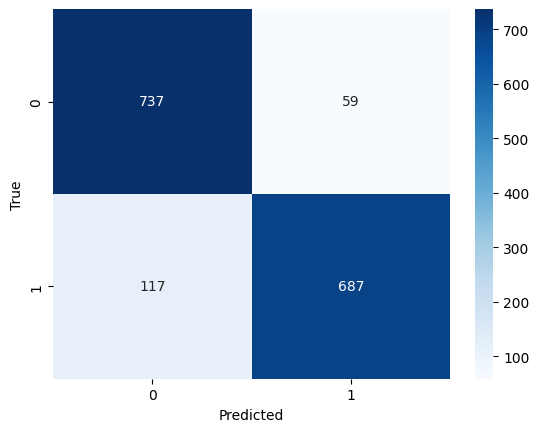

In [75]:
# confusion matrix for Adaboost

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred),fmt="d" ,annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [76]:
# Matthew's coefficient for adaboost

from sklearn.metrics import matthews_corrcoef

# Calculate MCC
mcc = matthews_corrcoef(y_test, y_pred)

# Print the MCC score
print("Matthew's Correlation Coefficient (MCC):", mcc)


Matthew's Correlation Coefficient (MCC): 0.7821310809802029


In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, average_precision_score, matthews_corrcoef
from sklearn.metrics import log_loss, balanced_accuracy_score, confusion_matrix, classification_report

# Calculate predictions from your Adaboost classifier
y_pred = adaboost_classifier.predict(X_test)

# True labels are in y_test

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

# AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", roc_auc)

# AUC-PR
average_precision = average_precision_score(y_test, y_pred)
print("AUC-PR (Average Precision):", average_precision)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print("Matthew's Correlation Coefficient (MCC):", mcc)

# Log Loss
logloss = log_loss(y_test, y_pred)
print("Log Loss:", logloss)

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_acc)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.89
Precision: 0.920911528150134
Recall: 0.8544776119402985
F1-Score: 0.8864516129032258
AUC-ROC: 0.8901785044626116
AUC-PR (Average Precision): 0.8600232833820175
Matthew's Correlation Coefficient (MCC): 0.7821310809802029
Log Loss: 3.964801872802887
Balanced Accuracy: 0.8901785044626116
Confusion Matrix:
[[737  59]
 [117 687]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89       796
         1.0       0.92      0.85      0.89       804

    accuracy                           0.89      1600
   macro avg       0.89      0.89      0.89      1600
weighted avg       0.89      0.89      0.89      1600



# Perceptron 

In [80]:
# Perceptron predictions

y_pred = preceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.500625


[[796   0]
 [799   5]]


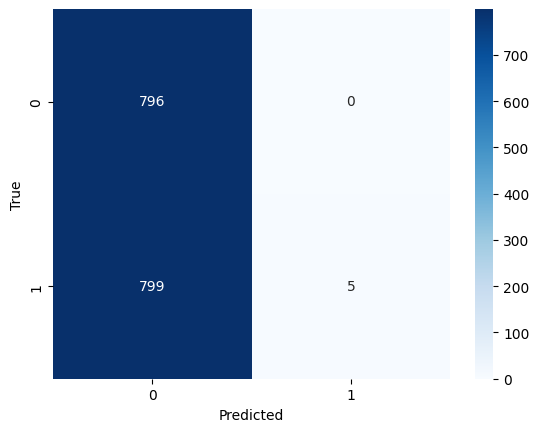

In [81]:
# Confusion matrix for Perceptron

print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred),fmt="d" ,annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [82]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

# AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", roc_auc)

# AUC-PR
average_precision = average_precision_score(y_test, y_pred)
print("AUC-PR (Average Precision):", average_precision)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print("Matthew's Correlation Coefficient (MCC):", mcc)

# Log Loss
logloss = log_loss(y_test, y_pred)
print("Log Loss:", logloss)

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_acc)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.500625
Precision: 1.0
Recall: 0.006218905472636816
F1-Score: 0.012360939431396786
AUC-ROC: 0.5031094527363185
AUC-PR (Average Precision): 0.5055939054726368
Matthew's Correlation Coefficient (MCC): 0.05571000121947514
Log Loss: 17.99929941119038
Balanced Accuracy: 0.5031094527363185
Confusion Matrix:
[[796   0]
 [799   5]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67       796
         1.0       1.00      0.01      0.01       804

    accuracy                           0.50      1600
   macro avg       0.75      0.50      0.34      1600
weighted avg       0.75      0.50      0.34      1600



# SVM

In [83]:
# SVM predictions

y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.519375


[[ 46 750]
 [ 19 785]]


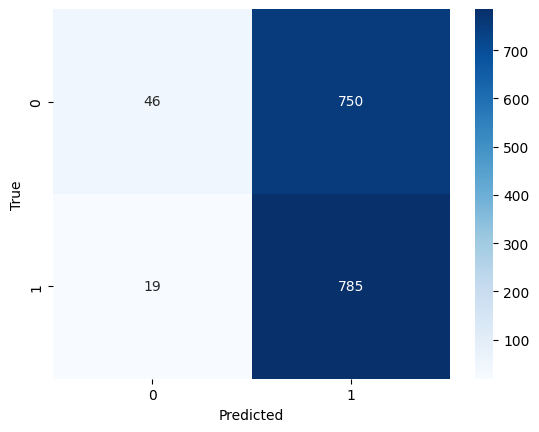

In [84]:
# Confusion matrix for SVM

print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred),fmt="d" ,annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [85]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

# AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", roc_auc)

# AUC-PR
average_precision = average_precision_score(y_test, y_pred)
print("AUC-PR (Average Precision):", average_precision)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print("Matthew's Correlation Coefficient (MCC):", mcc)

# Log Loss
logloss = log_loss(y_test, y_pred)
print("Log Loss:", logloss)

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_acc)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.519375
Precision: 0.511400651465798
Recall: 0.9763681592039801
F1-Score: 0.6712270200940573
AUC-ROC: 0.5170785519637991
AUC-PR (Average Precision): 0.5111903126873775
Matthew's Correlation Coefficient (MCC): 0.0865076931594436
Log Loss: 17.32348091014443
Balanced Accuracy: 0.5170785519637991
Confusion Matrix:
[[ 46 750]
 [ 19 785]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.06      0.11       796
         1.0       0.51      0.98      0.67       804

    accuracy                           0.52      1600
   macro avg       0.61      0.52      0.39      1600
weighted avg       0.61      0.52      0.39      1600



# GBM

In [86]:
# GBM predictions

y_pred = gbm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.994375


[[796   0]
 [  9 795]]


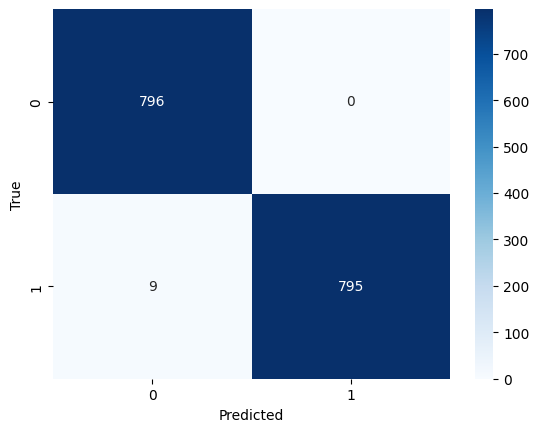

In [87]:
# Confusion matrix for GBM

print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred),fmt="d" ,annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [88]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

# AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", roc_auc)

# AUC-PR
average_precision = average_precision_score(y_test, y_pred)
print("AUC-PR (Average Precision):", average_precision)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print("Matthew's Correlation Coefficient (MCC):", mcc)

# Log Loss
logloss = log_loss(y_test, y_pred)
print("Log Loss:", logloss)

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_acc)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.994375
Precision: 1.0
Recall: 0.9888059701492538
F1-Score: 0.9943714821763603
AUC-ROC: 0.9944029850746269
AUC-PR (Average Precision): 0.9944309701492537
Matthew's Correlation Coefficient (MCC): 0.9888129229383814
Log Loss: 0.2027455503137842
Balanced Accuracy: 0.9944029850746269
Confusion Matrix:
[[796   0]
 [  9 795]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       796
         1.0       1.00      0.99      0.99       804

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



# Naive Bayes

In [89]:
# Decision Tree predictions 

y_pred = decision.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.995625


[[796   0]
 [  7 797]]


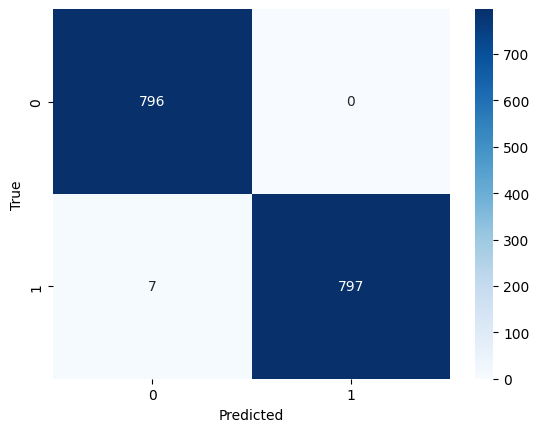

In [90]:
# Confusion matrix for Decision Tree

print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred),fmt="d" ,annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [91]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

# AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", roc_auc)

# AUC-PR
average_precision = average_precision_score(y_test, y_pred)
print("AUC-PR (Average Precision):", average_precision)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print("Matthew's Correlation Coefficient (MCC):", mcc)

# Log Loss
logloss = log_loss(y_test, y_pred)
print("Log Loss:", logloss)

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_acc)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.995625
Precision: 1.0
Recall: 0.9912935323383084
F1-Score: 0.9956277326670832
AUC-ROC: 0.9956467661691542
AUC-PR (Average Precision): 0.9956685323383084
Matthew's Correlation Coefficient (MCC): 0.9912881111107438
Log Loss: 0.15769098357738776
Balanced Accuracy: 0.9956467661691542
Confusion Matrix:
[[796   0]
 [  7 797]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       796
         1.0       1.00      0.99      1.00       804

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [92]:
# Saving the 5 different models as a pickle file

import pickle

pickle.dump(adaboost_classifier, open("adaboost_classifier.pkl", "wb"))
pickle.dump(preceptron, open("preceptron.pkl", "wb"))
pickle.dump(svm, open("svm.pkl", "wb"))
pickle.dump(gbm, open("gbm.pkl", "wb"))
pickle.dump(decision, open("decision.pkl", "wb"))